<a href="https://colab.research.google.com/github/PingPingE/Deeplearning_with_Keras/blob/master/day02_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 자동차 연비 예측하기


In [1]:
import tensorflow as tf

dataset_path = tf.keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path

import pandas as pd
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight', 'Acceleration', 'Model Year', 'Origin']
raw_dataset = pd.read_csv(dataset_path, names=column_names, na_values = "?", comment='\t',  sep=" ", skipinitialspace=True)
dataset = raw_dataset.copy()


In [2]:
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [3]:
# 결측치 확인하기
dataset.isnull().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [4]:
# 결측치 제거하기
dataset = dataset.dropna()

In [5]:
dataset.isnull().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [6]:
#one hot encoding
origin = dataset.pop('Origin')
for e,m in enumerate(['USA', 'Europe','Japan'],1):
  dataset[m] = (origin==e)*0.1

In [7]:
dataset

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
0,18.0,8,307.0,130.0,3504.0,12.0,70,0.1,0.0,0.0
1,15.0,8,350.0,165.0,3693.0,11.5,70,0.1,0.0,0.0
2,18.0,8,318.0,150.0,3436.0,11.0,70,0.1,0.0,0.0
3,16.0,8,304.0,150.0,3433.0,12.0,70,0.1,0.0,0.0
4,17.0,8,302.0,140.0,3449.0,10.5,70,0.1,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,0.1,0.0,0.0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0.0,0.1,0.0
395,32.0,4,135.0,84.0,2295.0,11.6,82,0.1,0.0,0.0
396,28.0,4,120.0,79.0,2625.0,18.6,82,0.1,0.0,0.0


In [8]:
#train ,test set 분리하기
trainset = dataset.sample(frac=0.8, random_state=0)
testset = dataset.drop(trainset.index)

In [9]:
trainset

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
146,28.0,4,90.0,75.0,2125.0,14.5,74,0.1,0.0,0.0
282,22.3,4,140.0,88.0,2890.0,17.3,79,0.1,0.0,0.0
69,12.0,8,350.0,160.0,4456.0,13.5,72,0.1,0.0,0.0
378,38.0,4,105.0,63.0,2125.0,14.7,82,0.1,0.0,0.0
331,33.8,4,97.0,67.0,2145.0,18.0,80,0.0,0.0,0.1
...,...,...,...,...,...,...,...,...,...,...
281,19.8,6,200.0,85.0,2990.0,18.2,79,0.1,0.0,0.0
229,16.0,8,400.0,180.0,4220.0,11.1,77,0.1,0.0,0.0
150,26.0,4,108.0,93.0,2391.0,15.5,74,0.0,0.0,0.1
145,32.0,4,83.0,61.0,2003.0,19.0,74,0.0,0.0,0.1


In [10]:
testset

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
9,15.0,8,390.0,190.0,3850.0,8.5,70,0.1,0.0,0.0
25,10.0,8,360.0,215.0,4615.0,14.0,70,0.1,0.0,0.0
28,9.0,8,304.0,193.0,4732.0,18.5,70,0.1,0.0,0.0
31,25.0,4,113.0,95.0,2228.0,14.0,71,0.0,0.0,0.1
33,19.0,6,232.0,100.0,2634.0,13.0,71,0.1,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
369,34.0,4,112.0,88.0,2395.0,18.0,82,0.1,0.0,0.0
375,36.0,4,105.0,74.0,1980.0,15.3,82,0.0,0.1,0.0
382,34.0,4,108.0,70.0,2245.0,16.9,82,0.0,0.0,0.1
384,32.0,4,91.0,67.0,1965.0,15.7,82,0.0,0.0,0.1


In [11]:
trans_stats =trainset.drop(['MPG', 'Japan','USA','Europe'], axis=1).describe().transpose()
trans_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0


In [12]:
def norm(x):
  return (x-trans_stats['mean'])/trans_stats['std']

In [13]:
X_train = norm(trainset.drop(['MPG', 'Japan','USA','Europe'], axis=1))
X_train.describe()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year
count,3.140000e+02,3.140000e+02,3.140000e+02,3.140000e+02,3.140000e+02,3.140000e+02
mean,2.093159e-16,1.018294e-16,-1.909301e-17,-9.723291e-17,2.688832e-15,9.561531e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.457657e+00,-1.220325e+00,-1.545283e+00,-1.589352e+00,-2.710152e+00,-1.604642e+00
25%,-8.693480e-01,-8.608943e-01,-7.512407e-01,-8.694784e-01,-6.307245e-01,-7.884578e-01
50%,-8.693480e-01,-4.247848e-01,-2.721905e-01,-1.987817e-01,-2.123729e-02,2.772599e-02
75%,1.483887e+00,6.750739e-01,6.071620e-01,7.320173e-01,5.882500e-01,8.439098e-01
max,1.483887e+00,2.489002e+00,3.153347e+00,2.547401e+00,3.313017e+00,1.660094e+00


In [14]:
X_train = pd.concat([X_train, trainset[['Japan','USA','Europe']]],axis=1)
X_train

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Japan,USA,Europe
146,-0.869348,-1.009459,-0.784052,-1.025303,-0.379759,-0.516397,0.0,0.1,0.0
282,-0.869348,-0.530218,-0.442811,-0.118796,0.624102,0.843910,0.0,0.1,0.0
69,1.483887,1.482595,1.447140,1.736877,-0.738281,-1.060519,0.0,0.1,0.0
378,-0.869348,-0.865687,-1.099044,-1.025303,-0.308055,1.660094,0.0,0.1,0.0
331,-0.869348,-0.942365,-0.994047,-1.001603,0.875068,1.115971,0.1,0.0,0.0
...,...,...,...,...,...,...,...,...,...
281,0.307270,0.044872,-0.521559,-0.000298,0.946772,0.843910,0.0,0.1,0.0
229,1.483887,1.961837,1.972127,1.457223,-1.598734,0.299787,0.0,0.1,0.0
150,-0.869348,-0.836932,-0.311564,-0.710099,-0.021237,-0.516397,0.1,0.0,0.0
145,-0.869348,-1.076553,-1.151543,-1.169870,1.233589,-0.516397,0.1,0.0,0.0


In [15]:
y_train = pd.DataFrame(trainset['MPG'])
y_train

,MPG
146,28.0
282,22.3
69,12.0
378,38.0
331,33.8
...,...
281,19.8
229,16.0
150,26.0
145,32.0


In [16]:
#testset도 X,y분리
y_test = pd.DataFrame(testset['MPG'])

trans_stats =testset.drop(['MPG', 'Japan','USA','Europe'], axis=1).describe().transpose()
trans_stats

X_test = norm(testset.drop(['MPG', 'Japan','USA','Europe'], axis=1))


In [17]:
X_test = pd.concat([X_test, testset[['Japan','USA','Europe']]],axis=1)

In [18]:
X_test

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Japan,USA,Europe
9,1.465721,1.870864,2.164711,1.055446,-2.630595,-1.694775,0.0,0.1,0.0
25,1.465721,1.589160,2.785748,1.929831,-0.554574,-1.694775,0.0,0.1,0.0
28,1.465721,1.063312,2.239236,2.063561,1.143989,-1.694775,0.0,0.1,0.0
31,-0.832294,-0.730203,-0.195228,-0.798479,-0.554574,-1.426091,0.1,0.0,0.0
33,0.316714,0.387223,-0.071021,-0.334426,-0.932032,-1.426091,0.0,0.1,0.0
...,...,...,...,...,...,...,...,...,...
369,-0.832294,-0.739594,-0.369119,-0.607600,0.955260,1.529431,0.0,0.1,0.0
375,-0.832294,-0.805325,-0.716899,-1.081940,-0.063878,1.529431,0.0,0.0,0.1
382,-0.832294,-0.777154,-0.816265,-0.779048,0.540056,1.529431,0.1,0.0,0.0
384,-0.832294,-0.936786,-0.890790,-1.099085,0.087106,1.529431,0.1,0.0,0.0


In [19]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
                          keras.layers.Dense(64, activation='relu', input_shape = [len(X_train.columns)]),
                          keras.layers.Dense(64, activation = 'relu'),
                          keras.layers.Dense(1, activation='linear')
])


In [20]:
len(X_train.columns)

9

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                640       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


In [22]:
optimizer = keras.optimizers.SGD(lr=0.01)
model.compile(optimizer = optimizer ,loss='mse', metrics=['mae'])

history = model.fit(X_train, y_train,epochs=1000, validation_split= 0.2)

Epoch 1/1000
8/8 [==============================] - 0s 21ms/step - loss: 395.2332 - mae: 17.7969 - val_loss: 42.9416 - val_mae: 5.2417
Epoch 2/1000
8/8 [==============================] - 0s 3ms/step - loss: 97.4051 - mae: 7.4595 - val_loss: 255.5864 - val_mae: 13.4061
Epoch 3/1000
8/8 [==============================] - 0s 3ms/step - loss: 78.7521 - mae: 6.3133 - val_loss: 9.0569 - val_mae: 2.2771
Epoch 4/1000
8/8 [==============================] - 0s 3ms/step - loss: 24.3892 - mae: 3.6233 - val_loss: 12.5887 - val_mae: 2.6242
Epoch 5/1000
8/8 [==============================] - 0s 3ms/step - loss: 25.9070 - mae: 3.6848 - val_loss: 20.4704 - val_mae: 3.5307
Epoch 6/1000
8/8 [==============================] - 0s 3ms/step - loss: 30.4637 - mae: 3.8935 - val_loss: 121.2186 - val_mae: 9.4233
Epoch 7/1000
8/8 [==============================] - 0s 3ms/step - loss: 26.5506 - mae: 3.5936 - val_loss: 9.5800 - val_mae: 2.2974
Epoch 8/1000
8/8 [==============================] - 0s 3ms/step - loss: 

In [23]:
# optimizer = keras.optimizers.Adam(lr=0.01)
# model.compile(optimizer = optimizer ,loss='mse', metrics=['mae'])

# history = model.fit(X_train, y_train,epochs=1000, validation_data= (X_test, y_test))

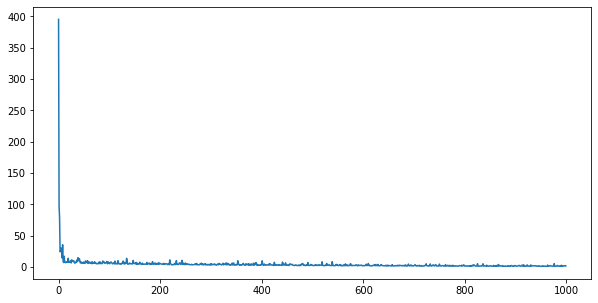

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])

In [25]:
hist_df = pd.DataFrame(history.history)

In [26]:
hist_df.describe()

,loss,mae,val_loss,val_mae
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,4.458148,1.330684,10.544599,2.389339
std,13.243436,0.727537,8.980354,0.513192
min,1.056441,0.646619,7.120891,1.976017
25%,2.169751,0.971693,8.854221,2.202816
50%,3.168883,1.213304,9.454414,2.294931
75%,4.904547,1.552436,10.490271,2.437891
max,395.233215,17.796875,255.586411,13.406091


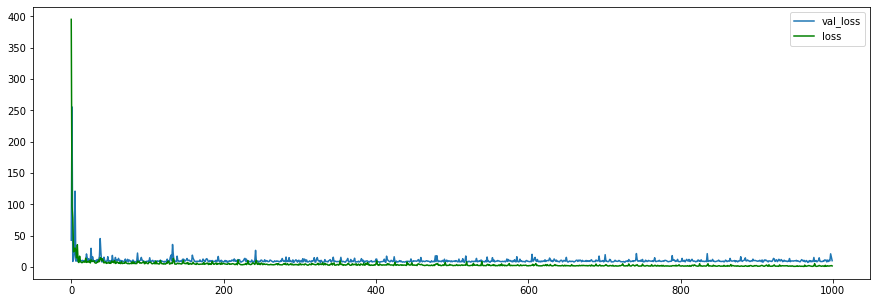

In [27]:
plt.figure(figsize=(15,5))
plt.plot(hist_df['val_loss'], label='val_loss')
plt.plot(hist_df['loss'], color= 'g',label='loss')
plt.legend()

In [28]:
pred = model.predict(X_test)

In [29]:
import numpy as np
def get_mse(pred, real):
  return np.mean((pred-real)**2)

In [30]:
print("Test mse: ", get_mse(pred,y_test))

Test mse:  MPG    6.806246
dtype: float64


In [31]:
#train 데이터의 평균 loss
np.mean(history.history['loss'])

4.458147889137268

# 주택가격 예측하기

 보스턴 주택 가격 데이터세트는 1978년 미국 보스턴 지역의 주택 가격으로,
- [01]  CRIM 자치시(town) 별 1인당 범죄율  
- [02]  ZN 25,000 평방피트를 초과하는 거주지역의 비율  
- [03]  INDUS 비소매상업지역이 점유하고 있는 토지의 비율  
- [04]  CHAS 찰스강에 대한 더미변수(강의 경계에 위치한 경우는 1, 아니면 0) 
- [05]  NOX 10ppm 당 농축 일산화질소 
- [06]  RM 주택 1가구당 평균 방의 개수  
- [07]  AGE 1940년 이전에 건축된 소유주택의 비율
- [08]  DIS 5개의 보스턴 직업센터까지의 접근성 지수 
- [09]  RAD 방사형 도로까지의 접근성 지수 
- [10]  TAX 10,000 달러 당 재산세율 
- [11]  PTRATIO 자치시(town)별 학생/교사 비율  
- [12]  B 1000(Bk-0.63)^2, 여기서 Bk는 자치시별 흑인의 비율을 말함.
- [13]  LSTAT 모집단의 하위계층의 비율(%) 
- [14]  MEDV 본인 소유의 주택가격(중앙값) (단위: $1,000)


In [32]:
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.font_manager as fm 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [33]:
col_names = {i:name for i,name in enumerate(['자치시별 범죄율', '지역별 넓은평수비율','비소매상업지역 점유율','찰스강 경계에 위치여부','10ppm당 농축 일산화질소','1가구당 평균 방개수','1940년 이전 건축 주택비율','직업센터까지의 접근성','방사형 도로 접근성','TAX 1만 달러당 재산세율','자치시별 학생/교사 비율','자치시별 흑인비율','하위계층 비율','본인 소유 주택가격(단위:1천 달러)'],1)}

In [34]:
!apt -qq -y install fonts-nanum > /dev/null

import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

font = fm.FontProperties(fname=fontpath, size=9)

fm._rebuild()

In [35]:
# 그래프에 retina display 적용

%config InlineBackend.figure_format = 'retina'

# Colab 의 한글 폰트 설정

plt.rc('font', family='NanumBarunGothic') 

In [36]:
#시각화를 위한 color 딕셔너리
color_dic = {0:['#005b6e','#04668c'],1:['#3c6ca7','#786eb7'],2:['#a86bba','#da66ac'],
             3:['#ff6792','#aa6792'],4:['#d8e0bb','#b6cec7'],5:['#ff5050','#ffaa00'],
            6:['#ff99ff','#ff6699',],7:['#e6f2ff','#99ccff'],8:['#ccccff','#cc99ff'],
            9:['#ff9966', '#ff6600']}

In [37]:
from tensorflow.keras.datasets import boston_housing
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

In [38]:
Xset = pd.concat([pd.DataFrame(X_train, columns=list(range(1,14))),pd.DataFrame(X_test, columns=list(range(1,14)))],axis=0)

In [39]:
yset =  pd.concat([pd.DataFrame(y_train,columns=[14]), pd.DataFrame(y_test, columns=[14])],axis=0)

In [40]:
total_df = pd.concat([Xset, yset],axis=1)
total_df

,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72,15.2
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11,42.3
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26,50.0
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01,21.1
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,3.47428,0.0,18.10,1.0,0.718,8.780,82.9,1.9047,24.0,666.0,20.2,354.55,5.29,21.9
98,0.07896,0.0,12.83,0.0,0.437,6.273,6.0,4.2515,5.0,398.0,18.7,394.92,6.78,24.1
99,1.83377,0.0,19.58,1.0,0.605,7.802,98.2,2.0407,5.0,403.0,14.7,389.61,1.92,50.0
100,0.35809,0.0,6.20,1.0,0.507,6.951,88.5,2.8617,8.0,307.0,17.4,391.70,9.71,26.7


In [41]:
total_df.describe()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [42]:
total_df.nunique()

1     504
2      26
3      76
4       2
5      81
6     446
7     356
8     412
9       9
10     66
11     46
12    357
13    455
14    229
dtype: int64

## 전체 컬럼에 대한 데이터 분포


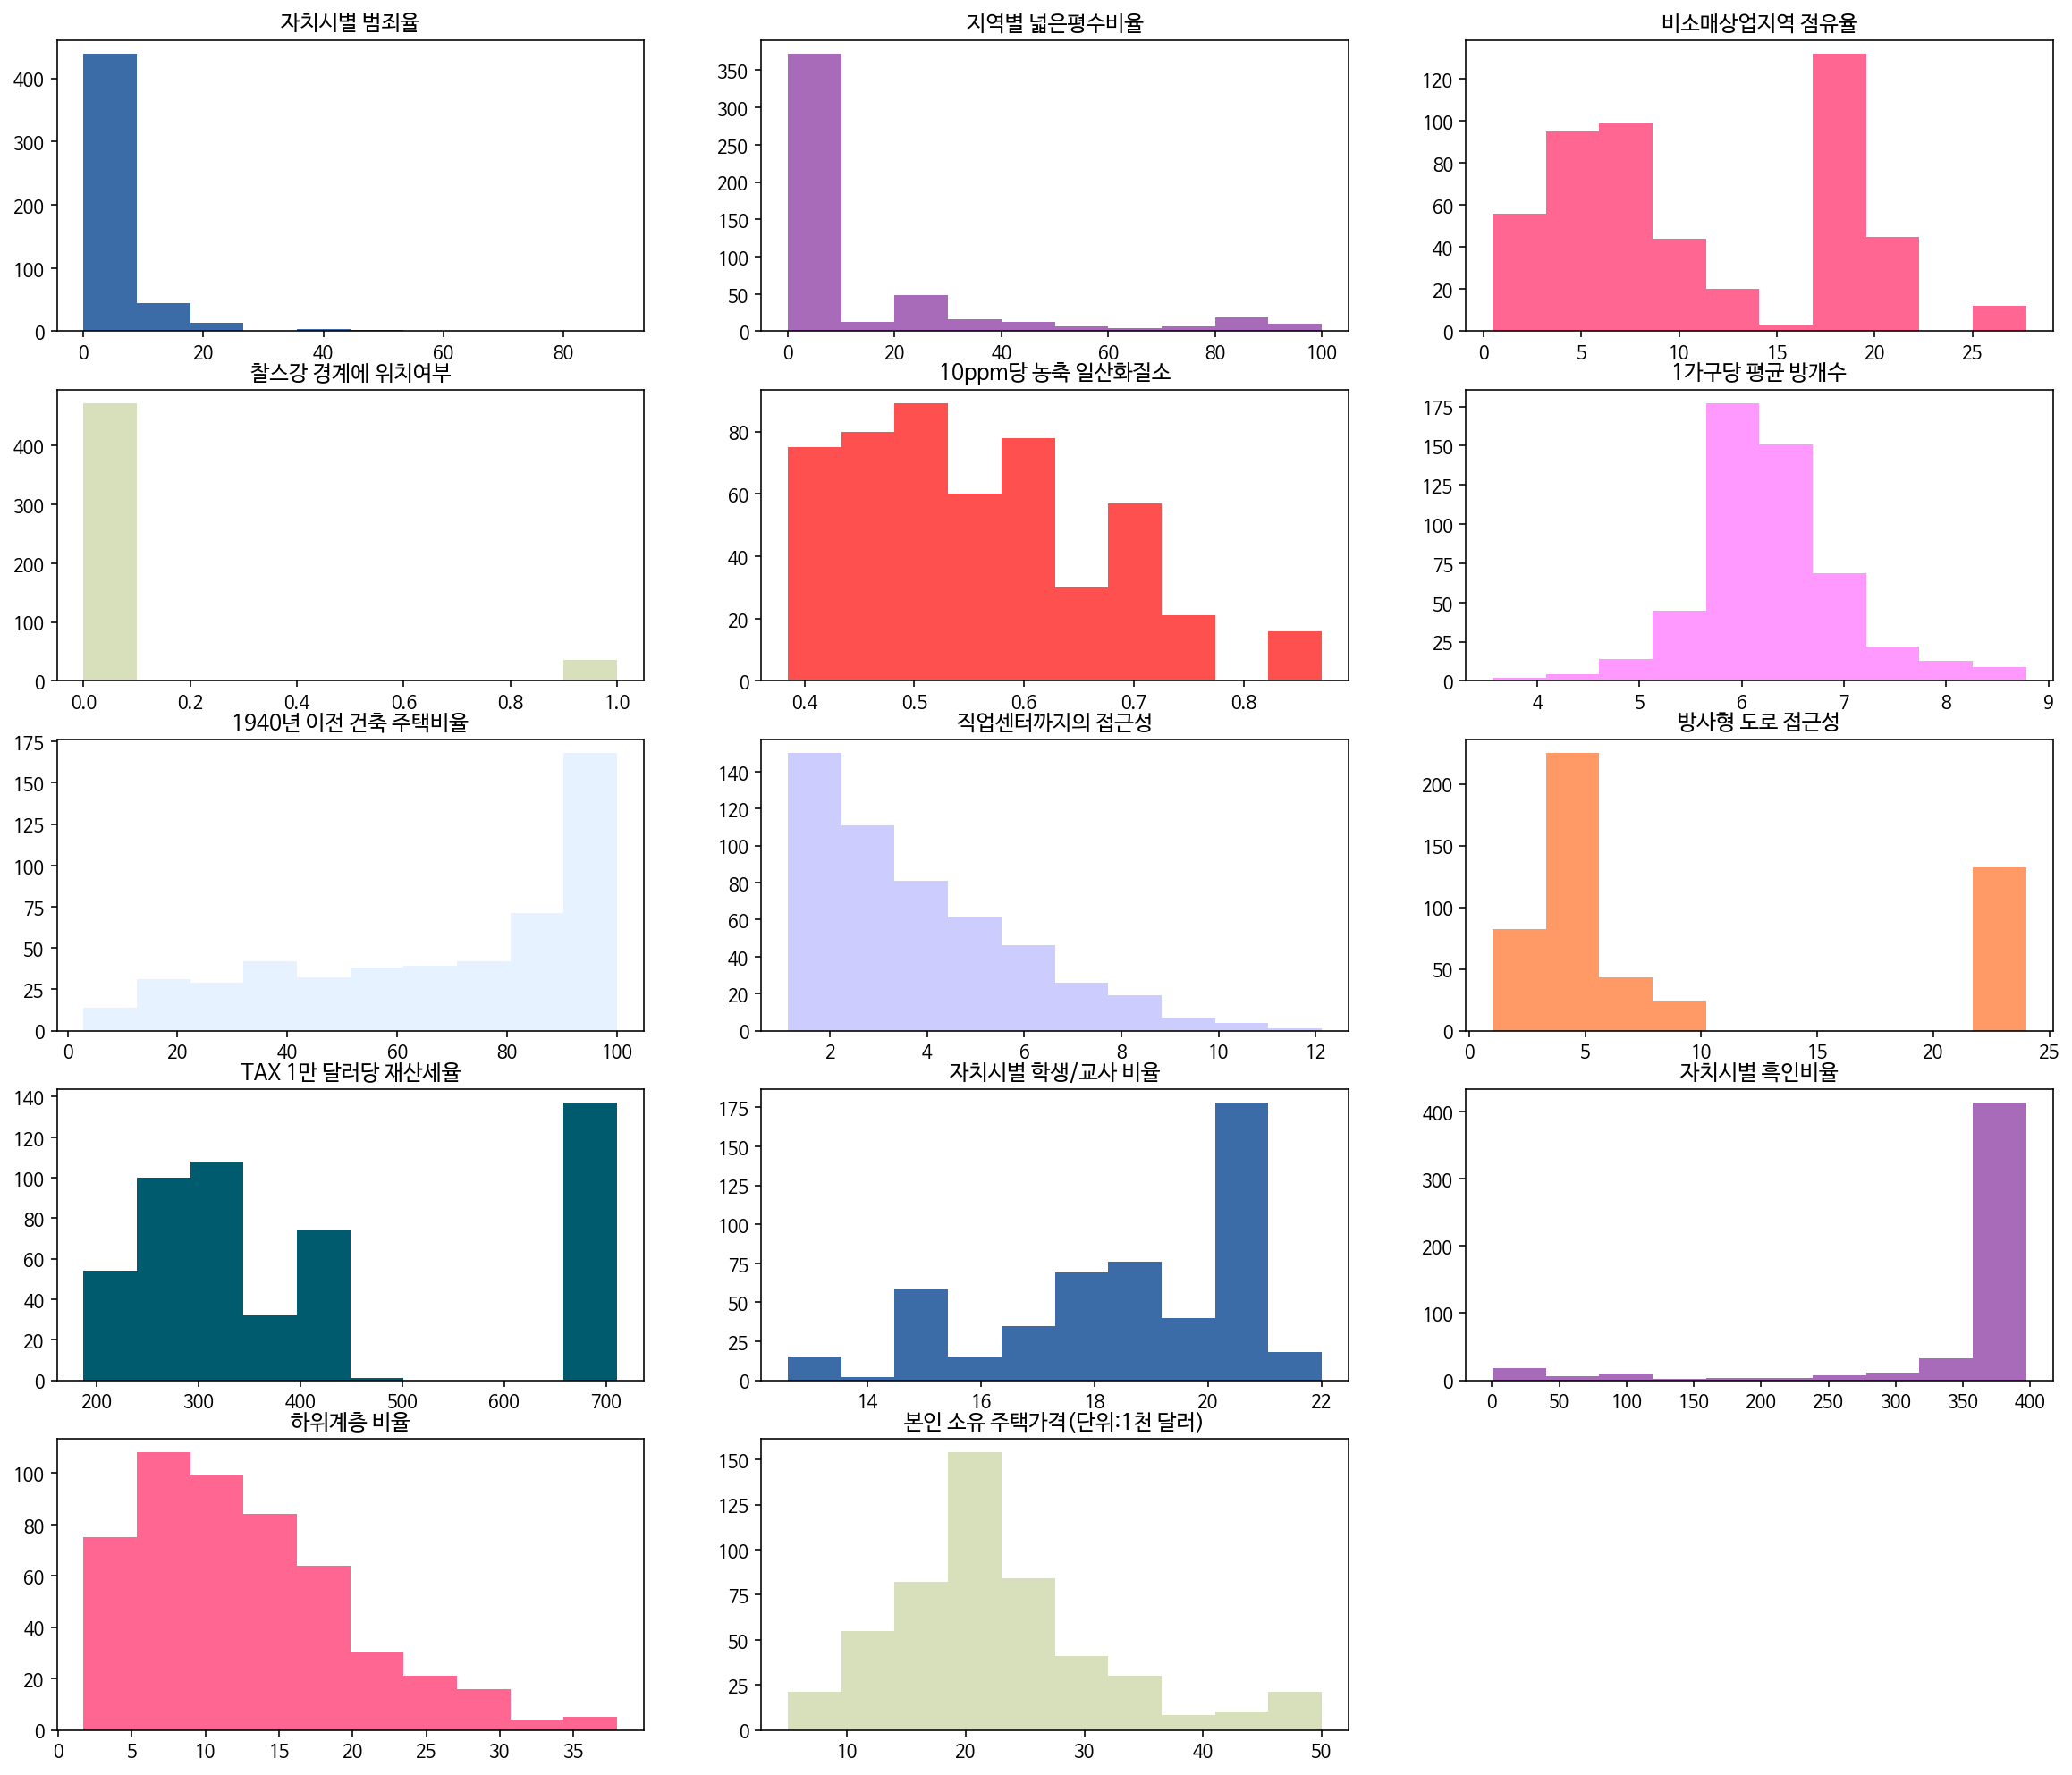

In [43]:
plt.figure(figsize=(20,15))
for e,c in enumerate(total_df.columns,1):
  plt.subplot(5,3,e)
  plt.subplots_adjust(top=1)
  plt.title(col_names[e])
  plt.hist(total_df[c],color =color_dic[e%10][0])
plt.show()

## 각 컬럼과 주택가격 컬럼의 상관성


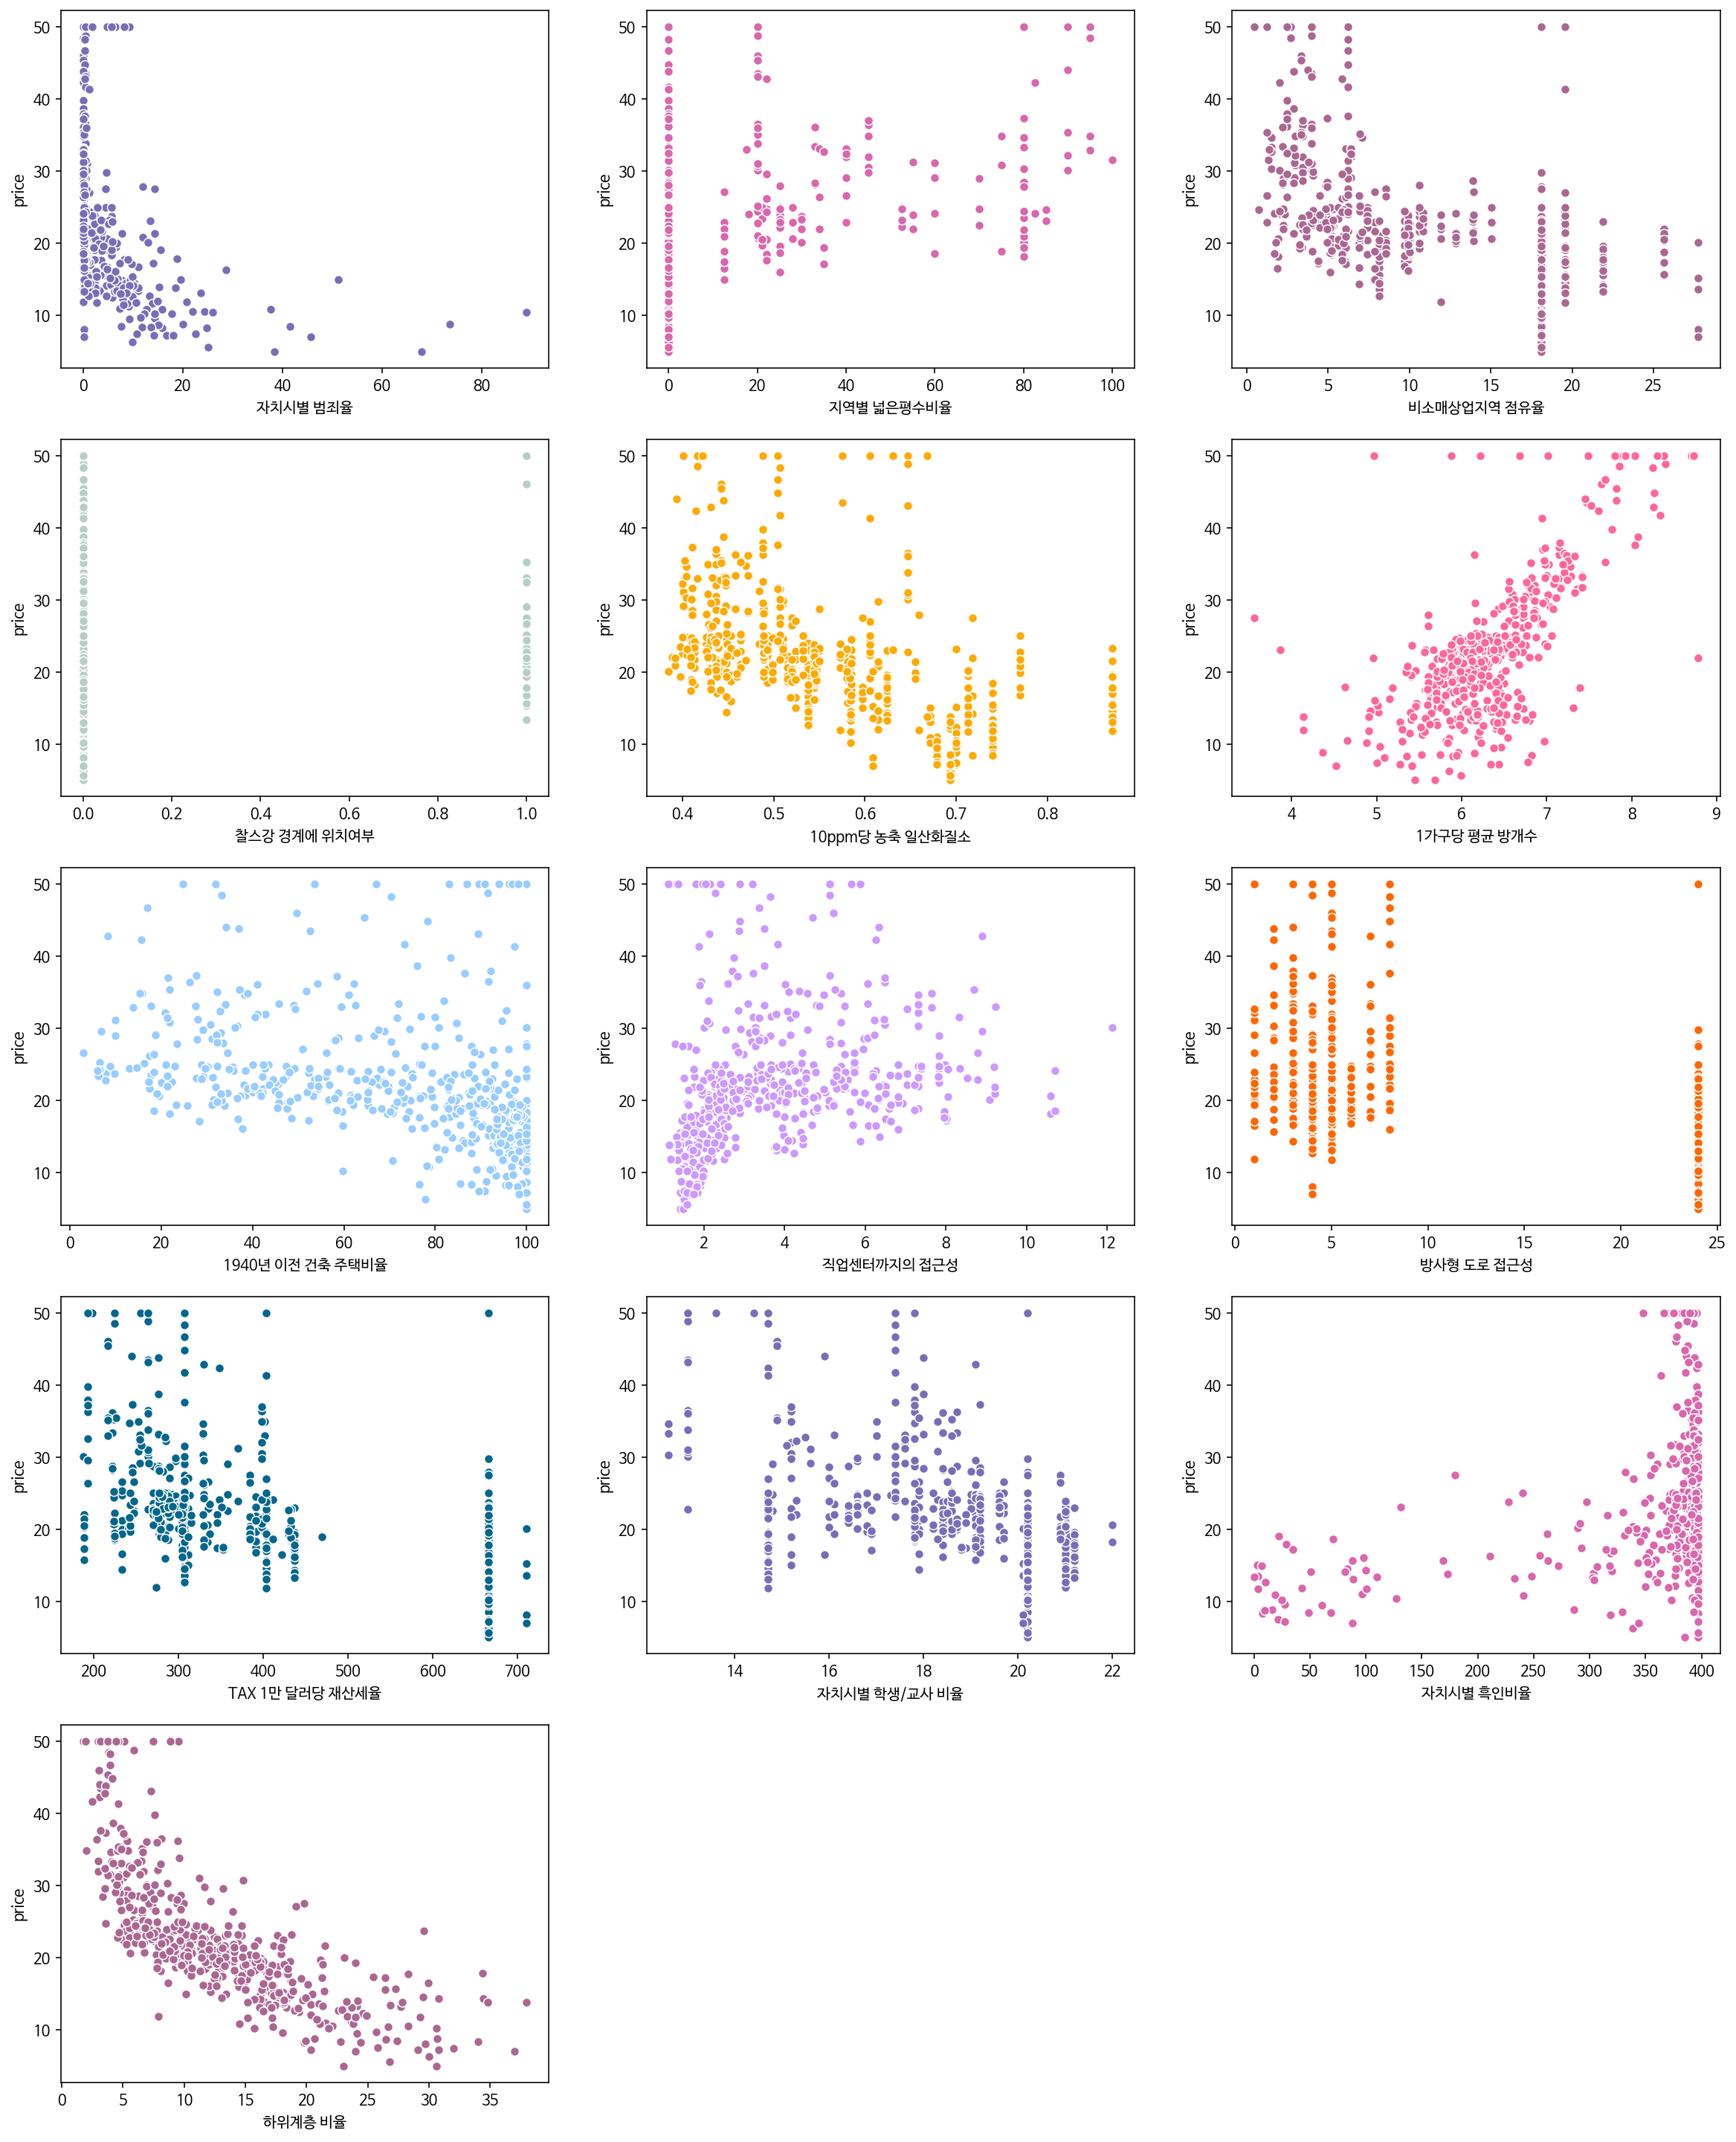

In [44]:
plt.figure(figsize=(20,18))
for e,c in enumerate(total_df.drop([14], axis=1).columns,1):
  plt.subplot(5,3,e)
  plt.subplots_adjust(top=1.2)

  sns.scatterplot(x=total_df[c], y=total_df[14],color =color_dic[e%10][1])
  plt.ylabel('price')
  plt.xlabel(col_names[e])
plt.show()

In [45]:
rename_df = total_df.rename(columns = col_names)

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


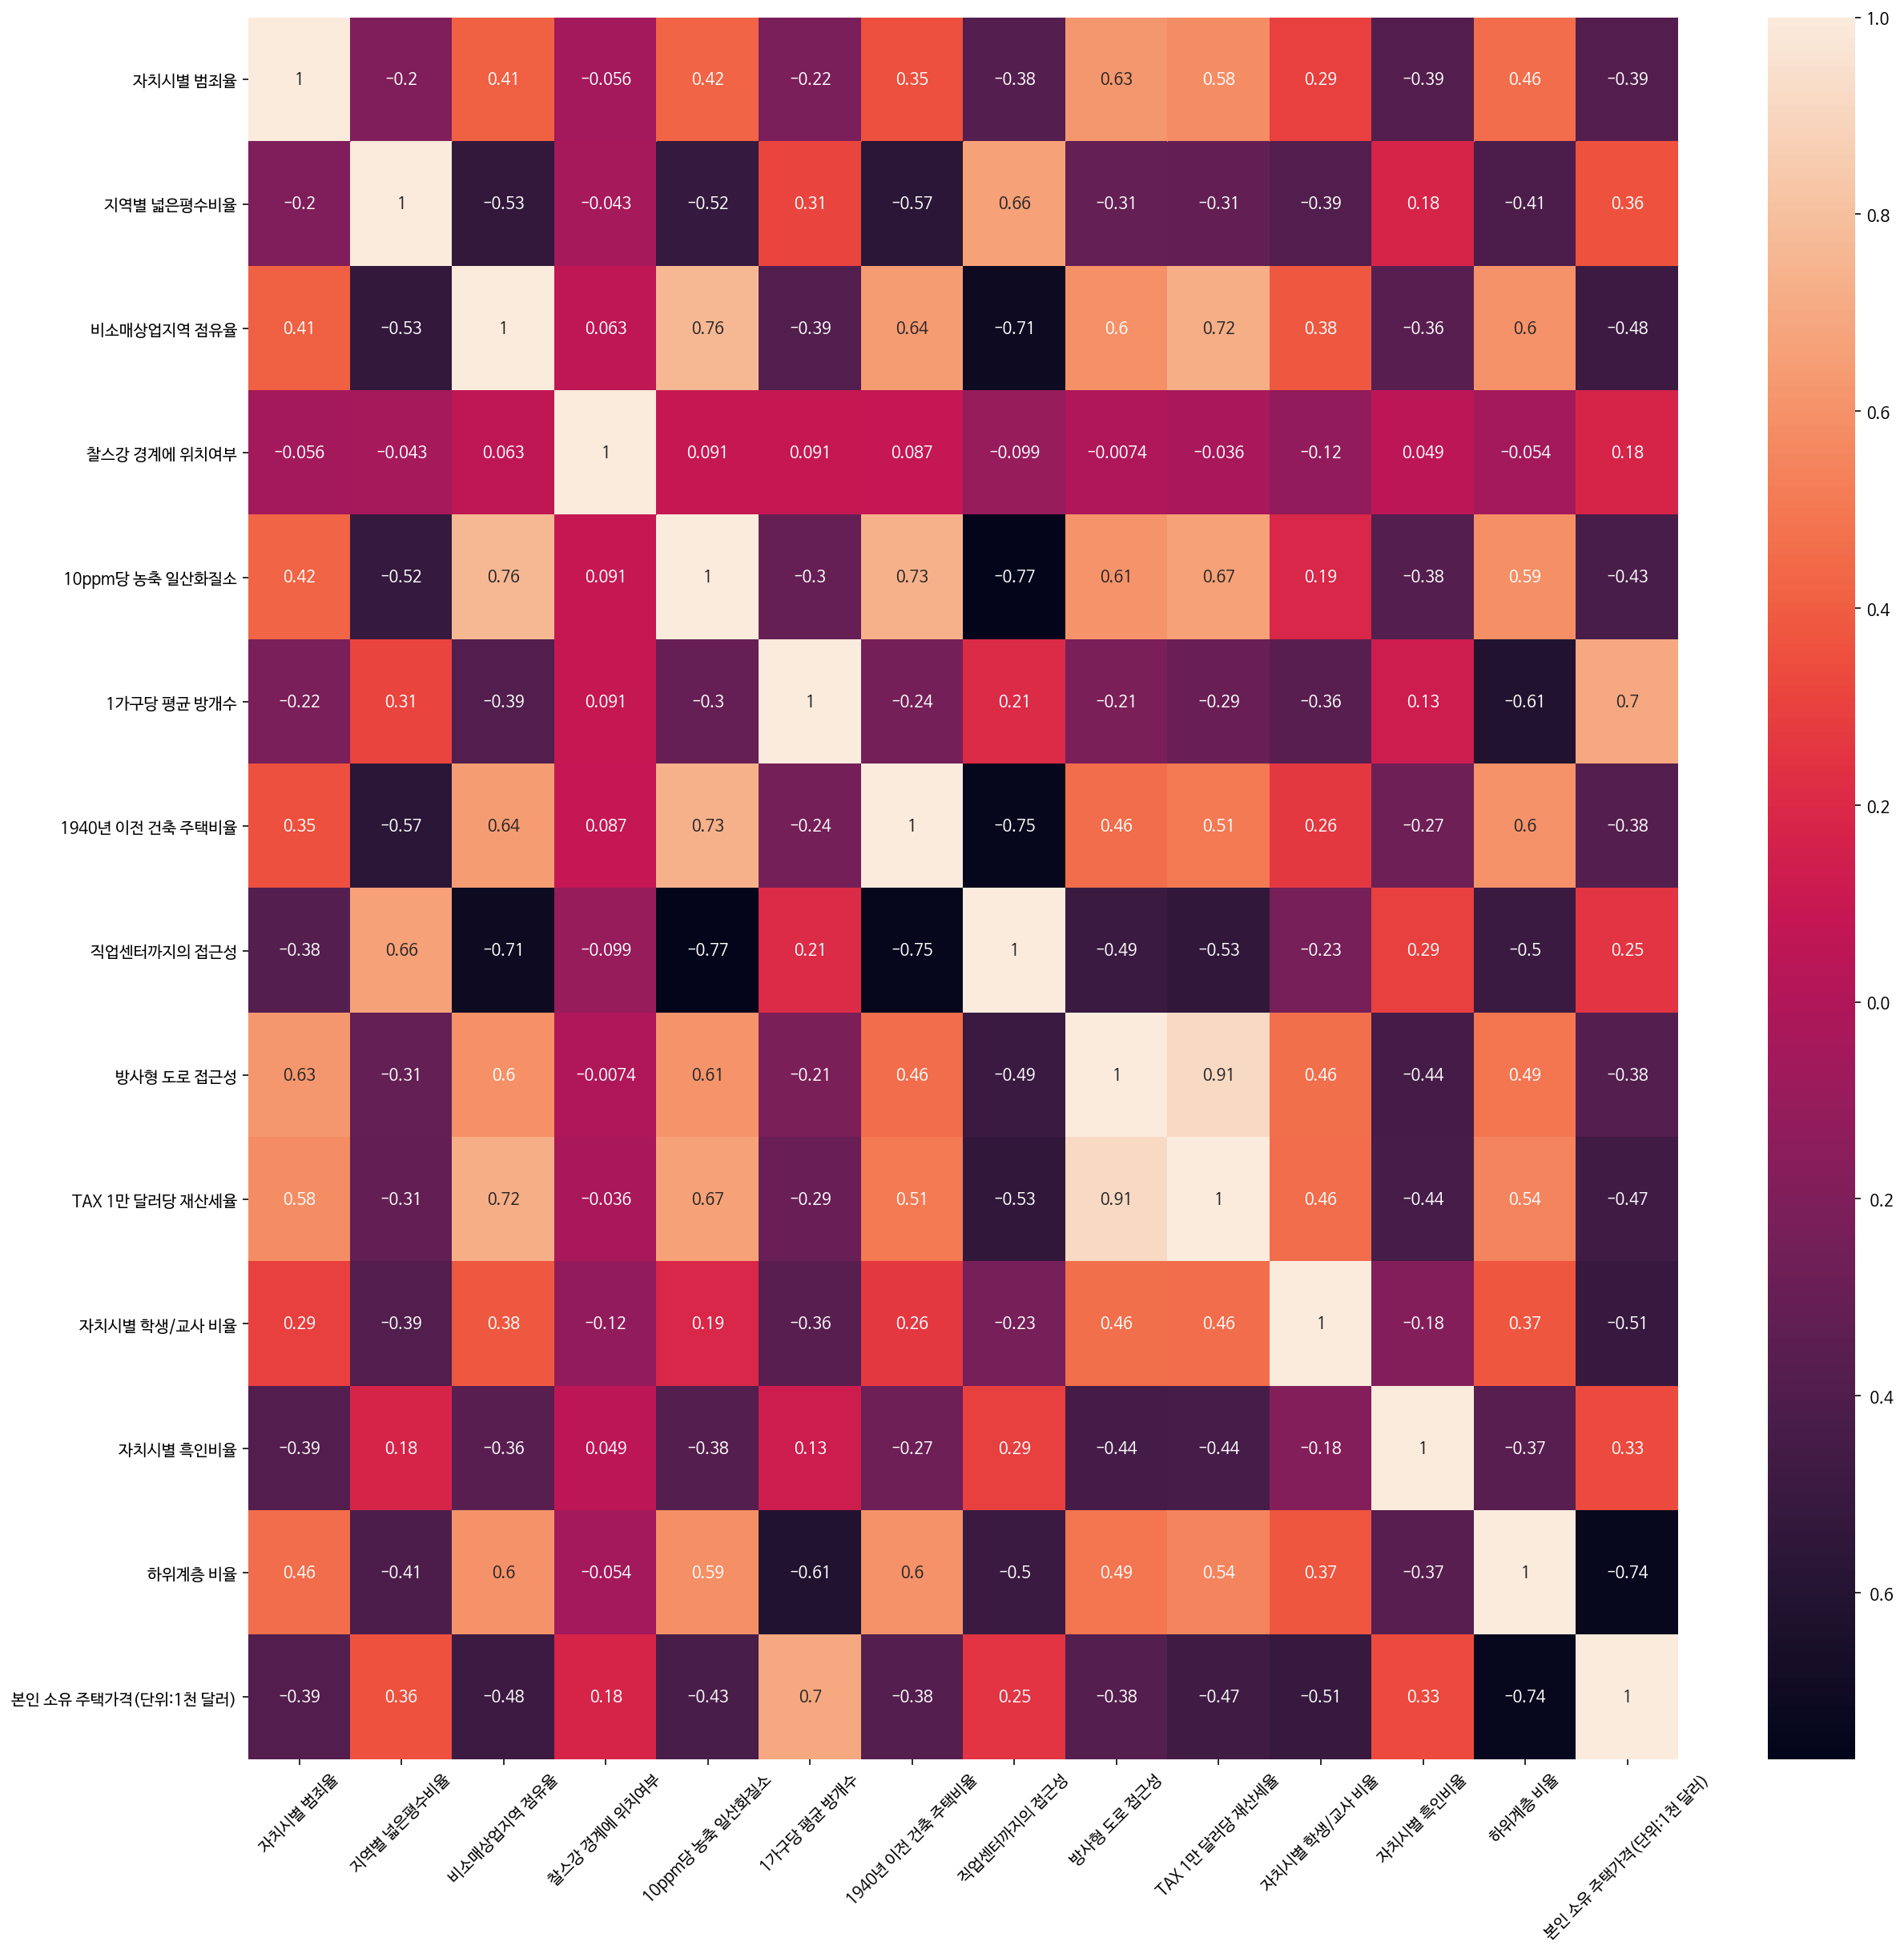

In [46]:
plt.figure(figsize=(20,20))
sns.heatmap(rename_df.corr(),annot=True)
plt.xticks(rotation=45)
plt.show()

----------------


In [47]:
from sklearn.preprocessing import StandardScaler
stand =StandardScaler()

In [48]:
stand_df = pd.DataFrame(stand.fit_transform(total_df.drop([14],axis=1)))
stand_df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.277091,-0.487722,-0.437258,-0.272599,-0.144217,-0.203205,0.822342,0.086449,-0.637962,-0.601276,1.176466,0.441052,0.850425
1,-0.417984,3.053142,-1.328764,-0.272599,-1.206732,1.888194,-1.880262,1.176518,-0.867883,-0.357765,-1.736418,0.424386,-1.337687
2,0.149504,-0.487722,1.015999,-0.272599,0.659147,-1.872905,1.117494,-1.170617,1.661245,1.530926,0.806576,0.206634,-1.316661
3,-0.415908,-0.487722,-0.867691,-0.272599,-0.342899,-0.352794,-1.211723,1.041181,-0.523001,-1.094237,0.806576,0.441052,-0.650836
4,0.009262,-0.487722,1.015999,-0.272599,1.367490,0.130165,0.704992,-0.583726,1.661245,1.530926,0.806576,0.381077,0.279918
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.016204,-0.487722,1.015999,3.668398,1.410682,3.555044,0.509409,-0.898611,1.661245,1.530926,0.806576,-0.023289,-1.032108
502,-0.411329,-0.487722,0.247057,-0.272599,-1.016689,-0.016575,-2.225199,0.216986,-0.523001,-0.060801,0.113032,0.419343,-0.823249
503,-0.207116,-0.487722,1.231945,3.668398,0.434551,2.161728,1.053485,-0.833960,-0.523001,-0.031105,-1.736418,0.361122,-1.504494
504,-0.378845,-0.487722,-0.720322,3.668398,-0.412006,0.949344,0.708548,-0.443682,-0.178120,-0.601276,-0.488039,0.384037,-0.412540


In [49]:
stand_df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02
mean,3.447506e-17,3.137587e-17,-4.168822e-17,-3.292272e-16,-1.575376e-16,1.148839e-15,-1.783817e-16,-8.973937e-17,1.404235e-17,3.222609e-18,-4.533045e-16,-2.308211e-16,1.611579e-16
std,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00
min,-4.197819e-01,-4.877224e-01,-1.557842e+00,-2.725986e-01,-1.465882e+00,-3.880249e+00,-2.335437e+00,-1.267069e+00,-9.828429e-01,-1.313990e+00,-2.707379e+00,-3.907193e+00,-1.531127e+00
25%,-4.109696e-01,-4.877224e-01,-8.676906e-01,-2.725986e-01,-9.130288e-01,-5.686303e-01,-8.374480e-01,-8.056878e-01,-6.379618e-01,-7.675760e-01,-4.880391e-01,2.050715e-01,-7.994200e-01
50%,-3.906665e-01,-4.877224e-01,-2.110985e-01,-2.725986e-01,-1.442174e-01,-1.084655e-01,3.173816e-01,-2.793234e-01,-5.230014e-01,-4.646726e-01,2.748590e-01,3.811865e-01,-1.812536e-01
75%,7.396560e-03,4.877224e-02,1.015999e+00,-2.725986e-01,5.986790e-01,4.827678e-01,9.067981e-01,6.623709e-01,1.661245e+00,1.530926e+00,8.065758e-01,4.336510e-01,6.030188e-01
max,9.933931e+00,3.804234e+00,2.422565e+00,3.668398e+00,2.732346e+00,3.555044e+00,1.117494e+00,3.960518e+00,1.661245e+00,1.798194e+00,1.638828e+00,4.410519e-01,3.548771e+00


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


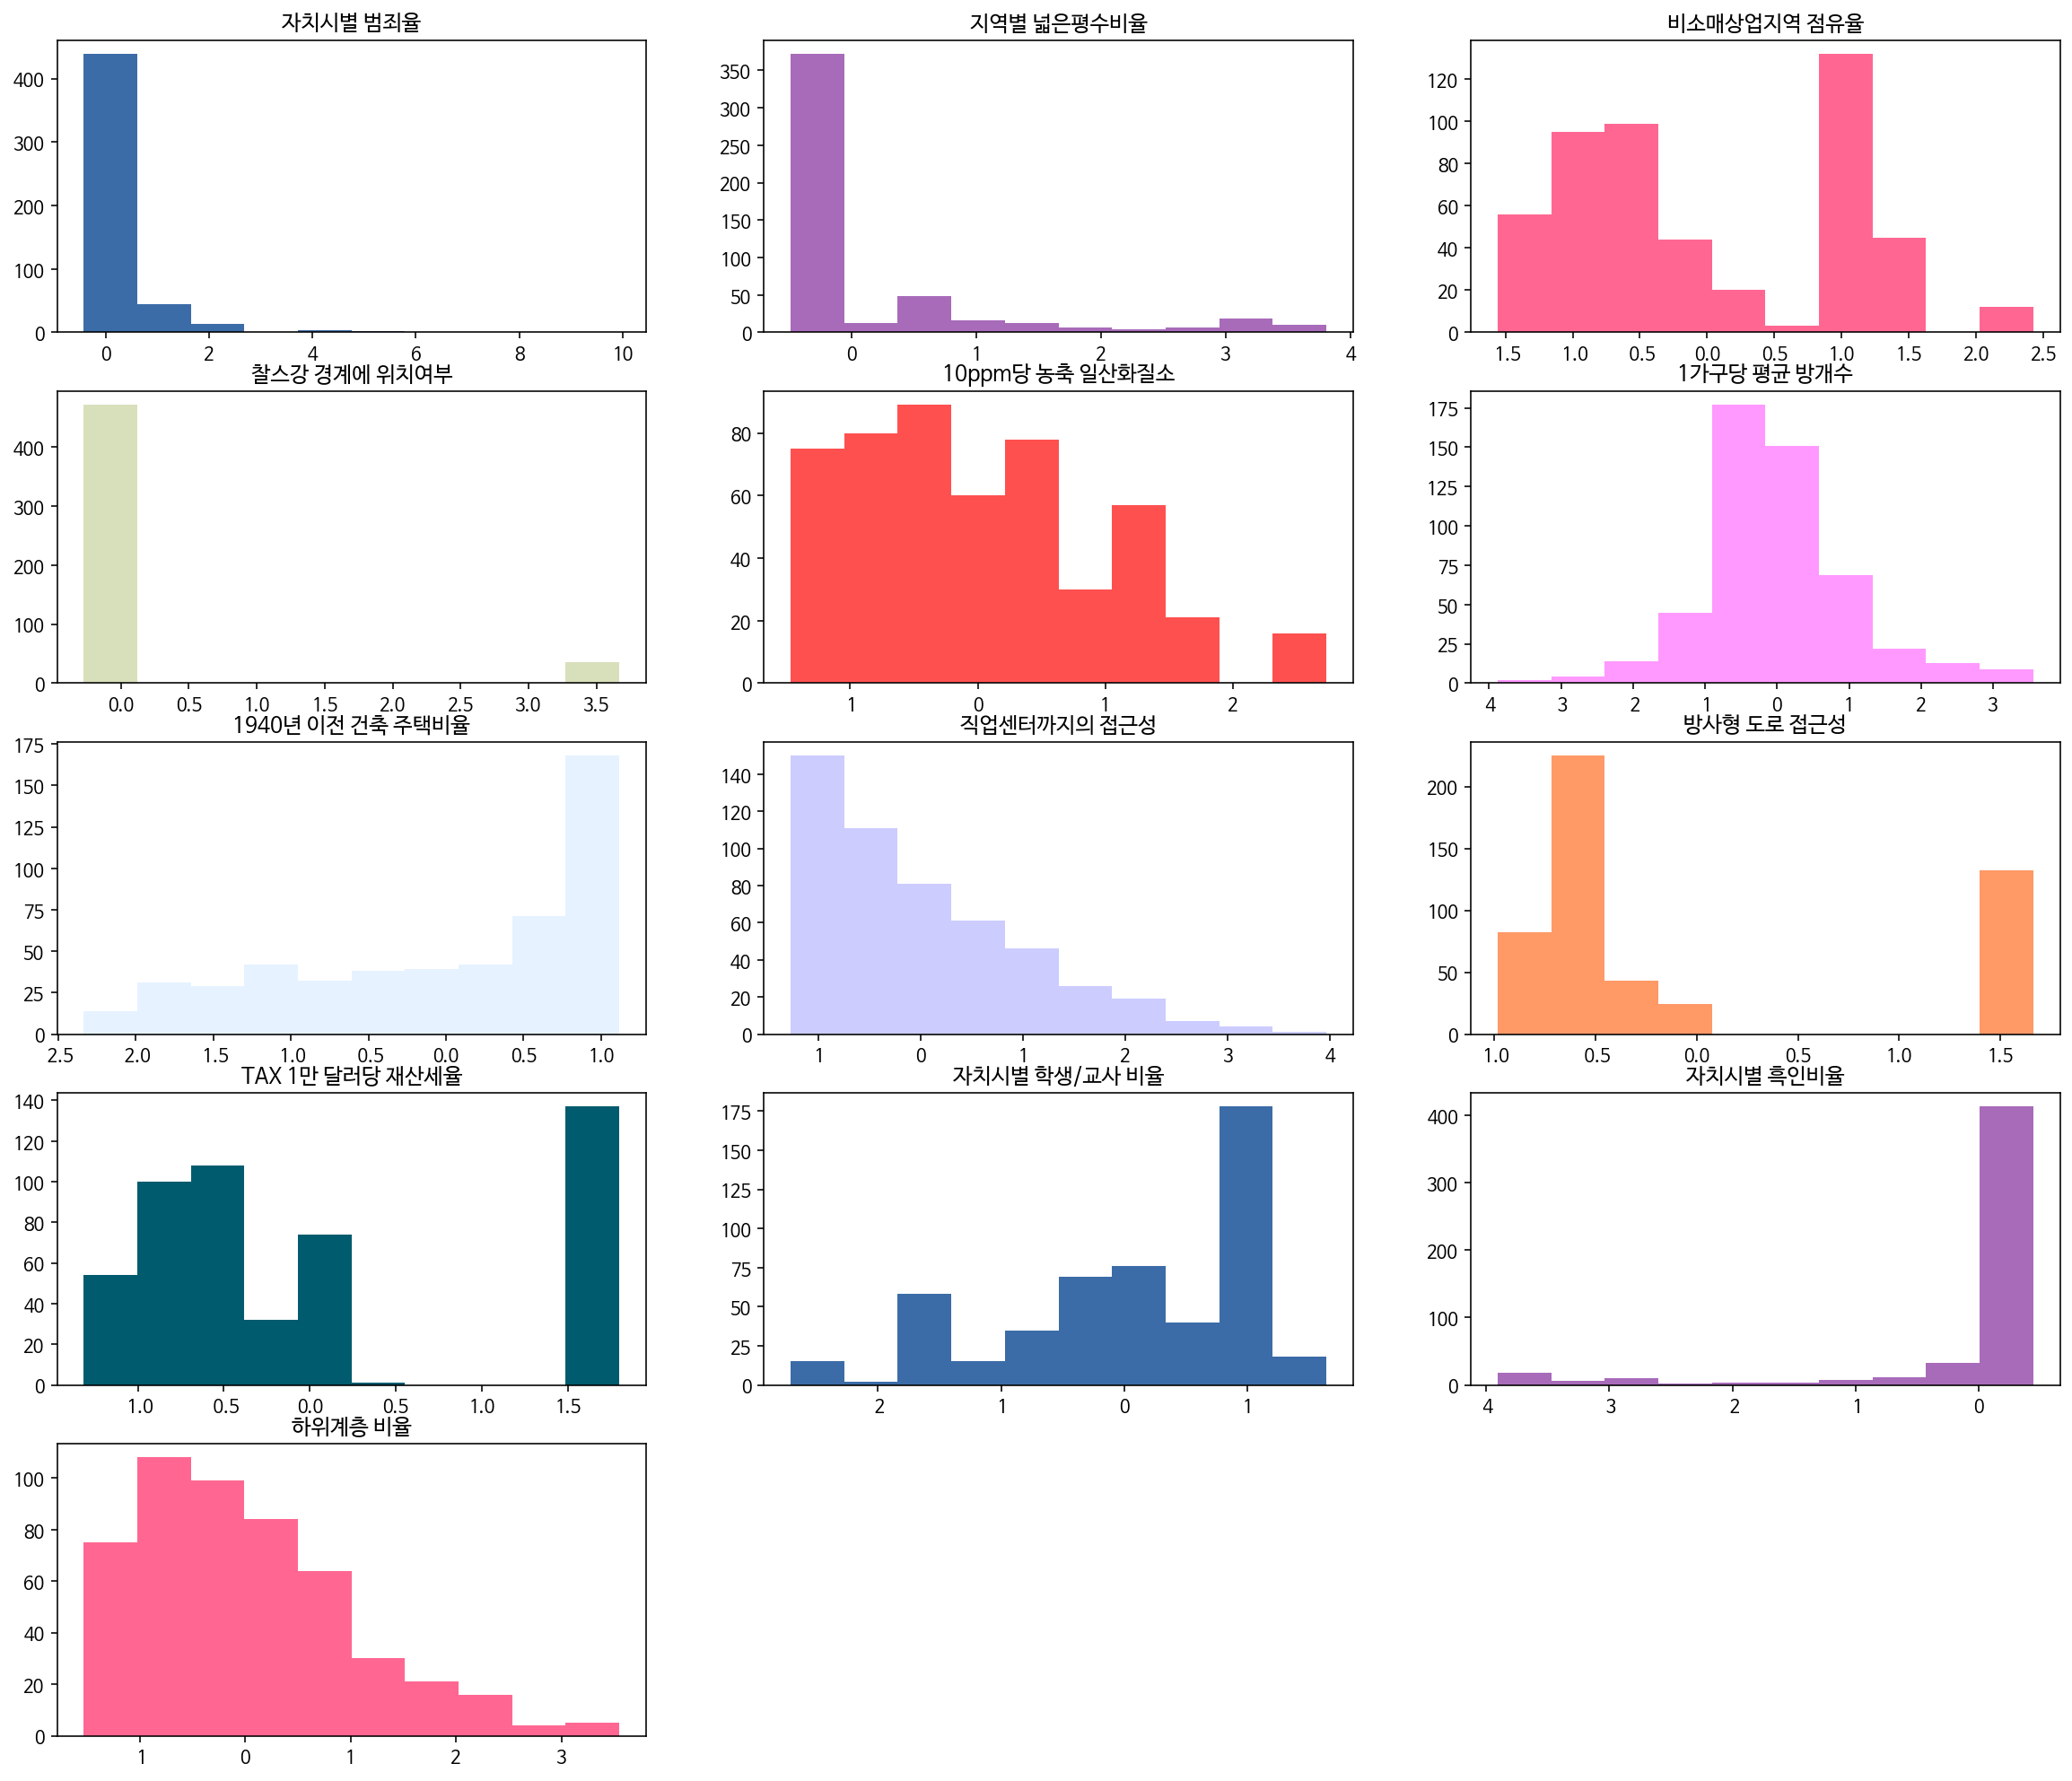

In [50]:
plt.figure(figsize=(20,15))
for e,c in enumerate(stand_df.columns,1):
  plt.subplot(5,3,e)
  plt.subplots_adjust(top=1)
  plt.title(col_names[e])
  plt.hist(stand_df[c],color =color_dic[e%10][0])
plt.show()

In [51]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test  = train_test_split(stand_df, total_df[14], test_size=0.2)

In [52]:
house_model = keras.Sequential([
                                keras.layers.Dense(units=32, activation= 'selu', input_shape = (len(X_train.columns),)),
                                keras.layers.Dense(units=64, activation = 'selu'),
                                keras.layers.Dense(units=64, activation = 'selu'),
                                keras.layers.Dense(units=128, activation = 'selu'),
                                keras.layers.Dense(units=1,activation='linear')
                                ])

In [53]:
house_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 32)                448       
_________________________________________________________________
dense_4 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_5 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_6 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 129       
Total params: 15,169
Trainable params: 15,169
Non-trainable params: 0
_________________________________________________________________


In [54]:
house_model.compile(optimizer=keras.optimizers.Adam(lr=0.01), loss='mse', metrics=['mse','mae'])

In [55]:
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau

In [56]:
house_history = house_model.fit(X_train, y_train, epochs=1000, validation_data = (X_test, y_test)) #test 데이터를 validation으로

Epoch 1/1000
13/13 [==============================] - 0s 14ms/step - loss: 233.9515 - mse: 233.9515 - mae: 11.9699 - val_loss: 93.7124 - val_mse: 93.7124 - val_mae: 8.1102
Epoch 2/1000
13/13 [==============================] - 0s 3ms/step - loss: 52.5502 - mse: 52.5502 - mae: 5.3926 - val_loss: 28.8232 - val_mse: 28.8232 - val_mae: 4.2601
Epoch 3/1000
13/13 [==============================] - 0s 3ms/step - loss: 40.5436 - mse: 40.5436 - mae: 4.8829 - val_loss: 25.8411 - val_mse: 25.8411 - val_mae: 3.6139
Epoch 4/1000
13/13 [==============================] - 0s 3ms/step - loss: 32.4454 - mse: 32.4454 - mae: 4.1433 - val_loss: 30.8458 - val_mse: 30.8458 - val_mae: 4.6217
Epoch 5/1000
13/13 [==============================] - 0s 3ms/step - loss: 26.0652 - mse: 26.0652 - mae: 3.6945 - val_loss: 19.9423 - val_mse: 19.9423 - val_mae: 3.3144
Epoch 6/1000
13/13 [==============================] - 0s 3ms/step - loss: 19.7900 - mse: 19.7900 - mae: 3.1666 - val_loss: 15.8561 - val_mse: 15.8561 - val_

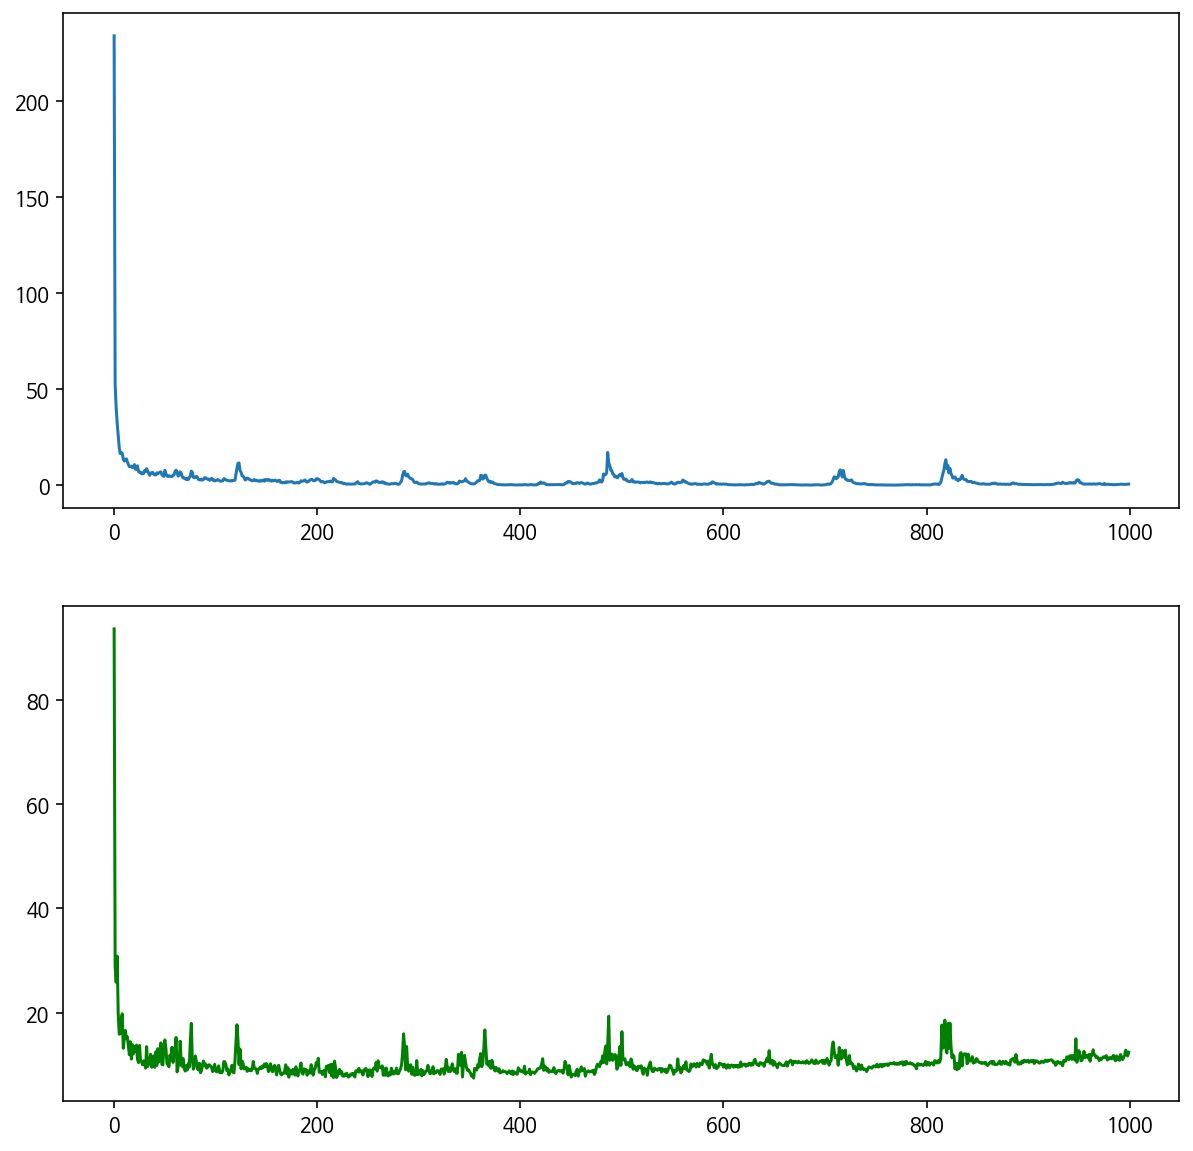

In [57]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(house_history.history['loss'])
plt.subplot(2,1,2)
plt.plot(house_history.history['val_loss'],color='g')

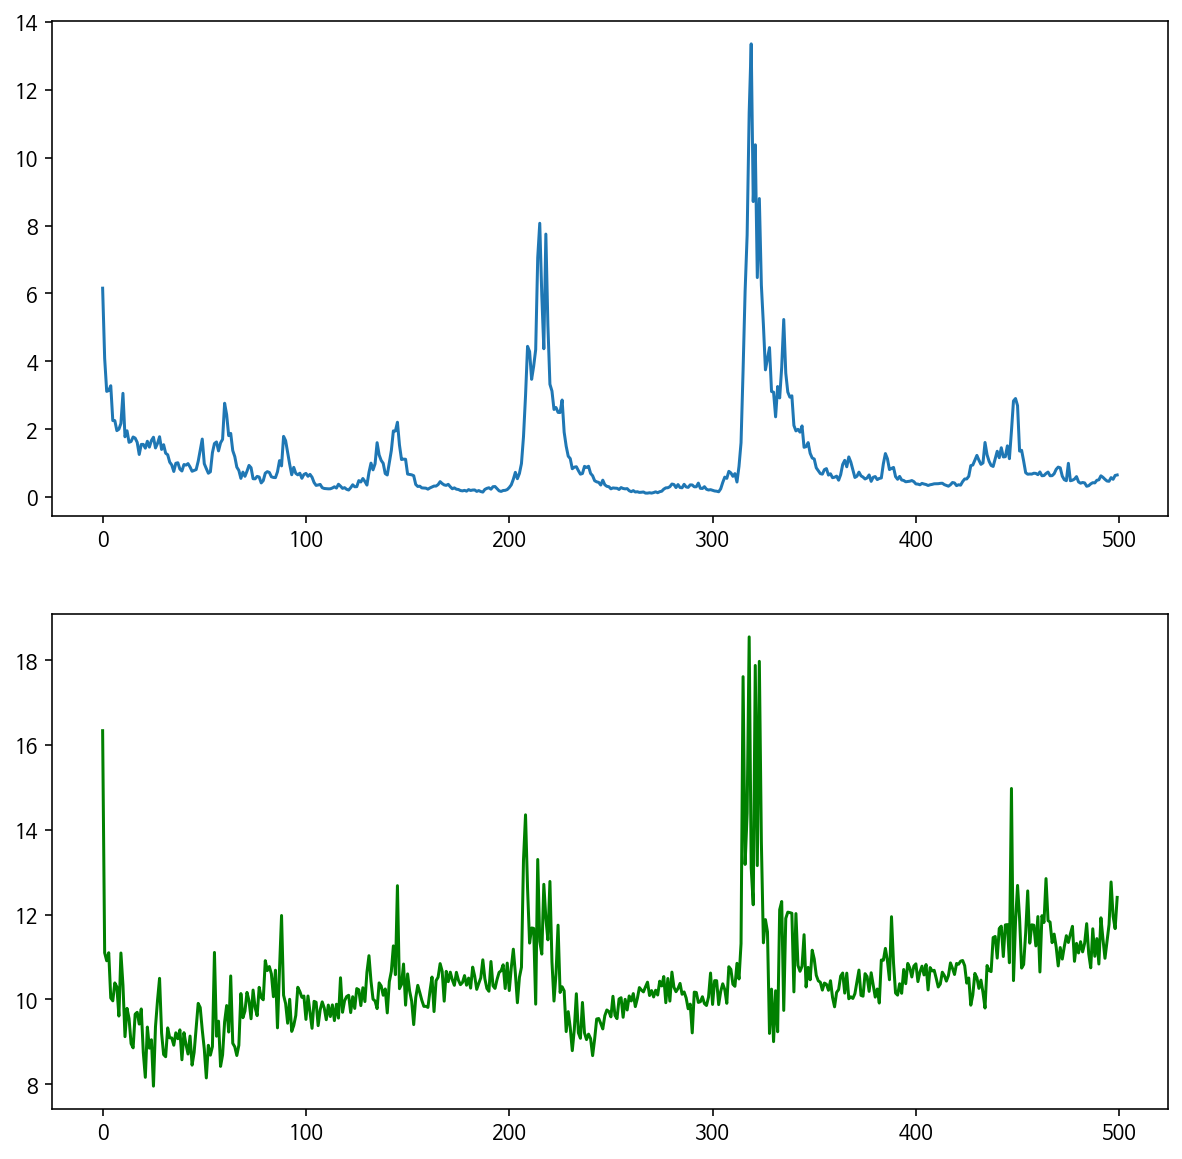

In [58]:
#epoch 500부터 보기
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(house_history.history['loss'][500:])
plt.subplot(2,1,2)
plt.plot(house_history.history['val_loss'][500:],color='g')

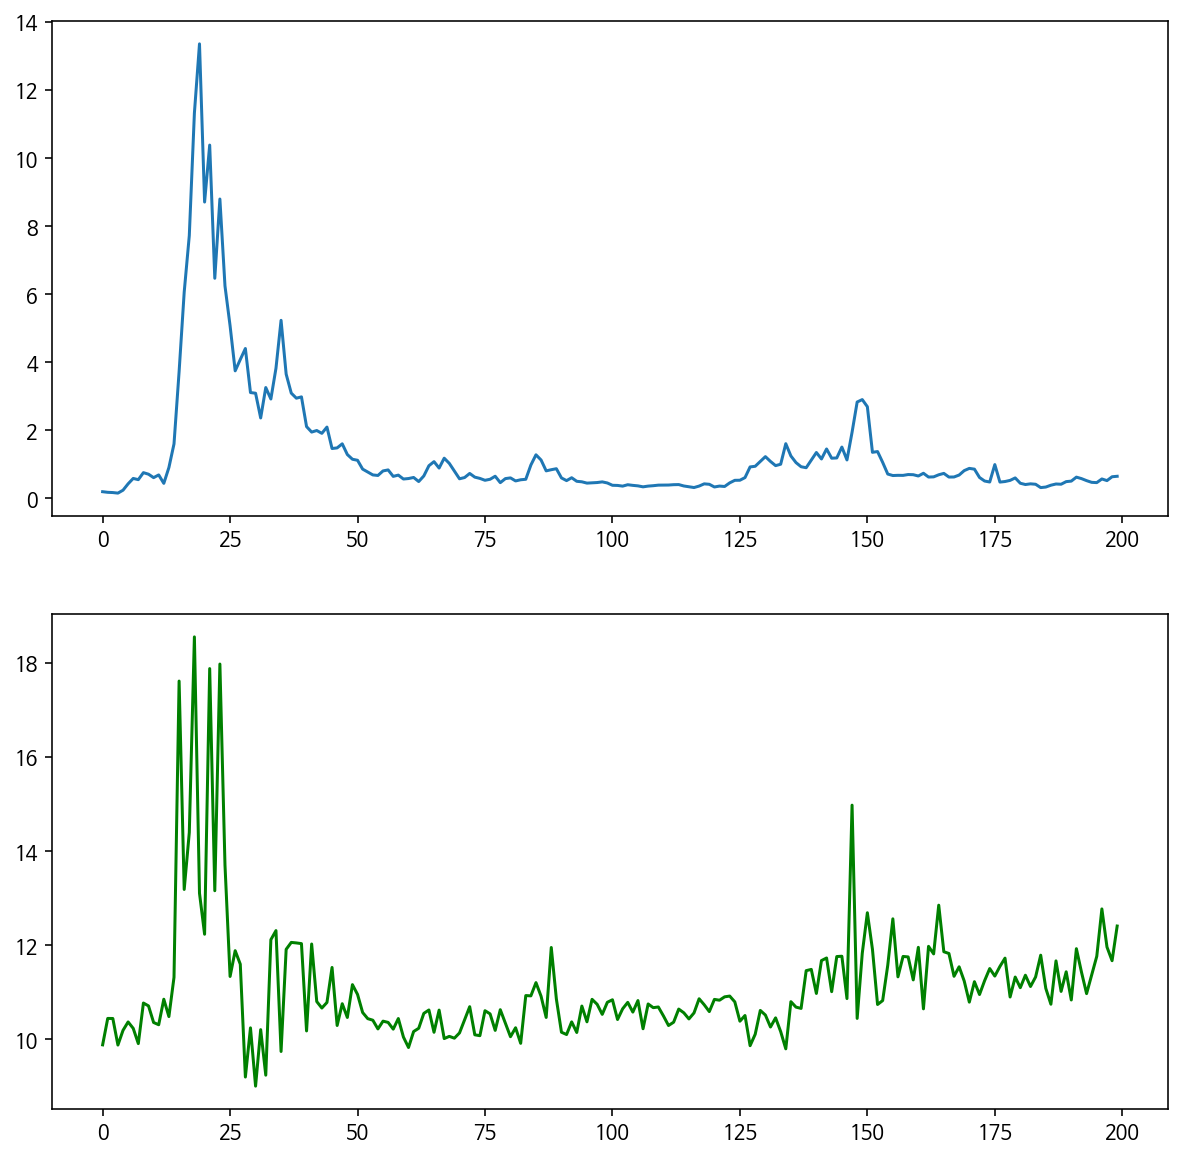

In [59]:
#epoch 800부터 보기
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(house_history.history['loss'][800:])
plt.subplot(2,1,2)
plt.plot(house_history.history['val_loss'][800:],color='g')